# Creation of Metric Space for Oxide Catalysts using ML (Large Dataset)
#### Aug 2024 - Nov 2024
---

In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# 2. Load Large Dataset
df = pd.read_csv("large_oxide_catalyst_data.csv")
df.head()

,Catalyst,BandGap,CrystalStructure,FormationEnergy,CatalyticActivity
0,Cat_0,4.058131,Rhombohedral,-4.074335,26.170568
1,Cat_1,9.531786,Tetragonal,-2.290495,24.697880
2,Cat_2,7.453942,Orthorhombic,-0.635271,90.625458
3,Cat_3,6.187256,Rhombohedral,-1.338876,24.954620
4,Cat_4,1.982177,Hexagonal,-0.967194,27.194973


In [3]:
# 3. One-hot Encoding for Crystal Structure
df_encoded = pd.get_dummies(df, columns=['CrystalStructure'])
features = df_encoded.drop(['Catalyst'], axis=1)
features.head()

,BandGap,FormationEnergy,CatalyticActivity,CrystalStructure_Hexagonal,CrystalStructure_Monoclinic,CrystalStructure_Orthorhombic,CrystalStructure_Rhombohedral,CrystalStructure_Tetragonal
0,4.058131,-4.074335,26.170568,False,False,False,True,False
1,9.531786,-2.290495,24.697880,False,False,False,False,True
2,7.453942,-0.635271,90.625458,False,False,True,False,False
3,6.187256,-1.338876,24.954620,False,False,False,True,False
4,1.982177,-0.967194,27.194973,True,False,False,False,False


In [4]:
# 4. Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df.head()

,BandGap,FormationEnergy,CatalyticActivity,CrystalStructure_Hexagonal,CrystalStructure_Monoclinic,CrystalStructure_Orthorhombic,CrystalStructure_Rhombohedral,CrystalStructure_Tetragonal
0,-0.396301,-1.102179,-0.828489,-0.495308,-0.481173,-0.504683,1.951331,-0.506242
1,1.576957,0.119447,-0.879179,-0.495308,-0.481173,-0.504683,-0.512471,1.975338
2,0.827893,1.252992,1.390047,-0.495308,-0.481173,1.981441,-0.512471,-0.506242
3,0.371251,0.771143,-0.870342,-0.495308,-0.481173,-0.504683,1.951331,-0.506242
4,-1.144685,1.025681,-0.793229,2.018946,-0.481173,-0.504683,-0.512471,-0.506242


In [5]:
# 5. Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled_df)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df[['Catalyst', 'PCA1', 'PCA2']].head()

,Catalyst,PCA1,PCA2
0,Cat_0,-1.084455,1.933609
1,Cat_1,0.256783,-0.501635
2,Cat_2,2.102432,-0.890889
3,Cat_3,-1.000047,1.350861
4,Cat_4,-1.945935,-1.686630


In [6]:
# 6. Clustering with K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled_df)
df[['Catalyst', 'Cluster']].head()

,Catalyst,Cluster
0,Cat_0,0
1,Cat_1,1
2,Cat_2,3
3,Cat_3,0
4,Cat_4,2


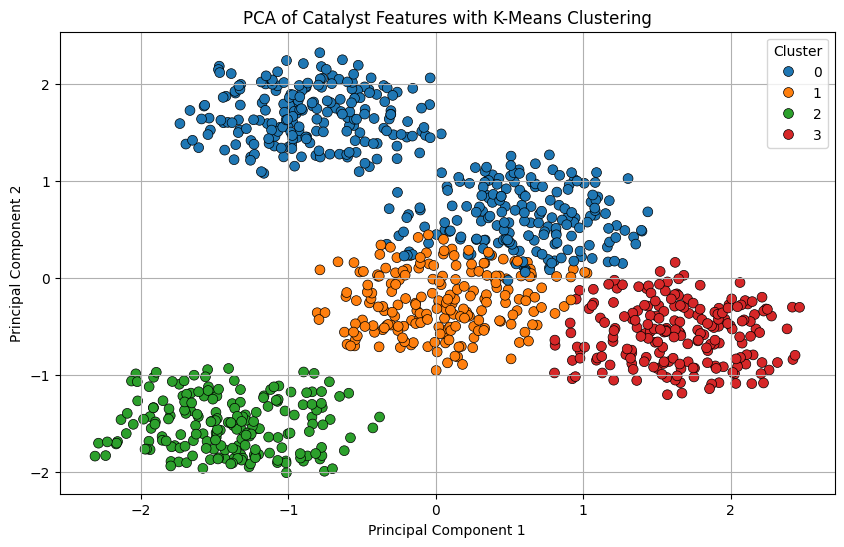

In [7]:
# 7. PCA Scatter Plot with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='tab10', s=50, linewidth=0.5, edgecolor='black')
plt.title('PCA of Catalyst Features with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

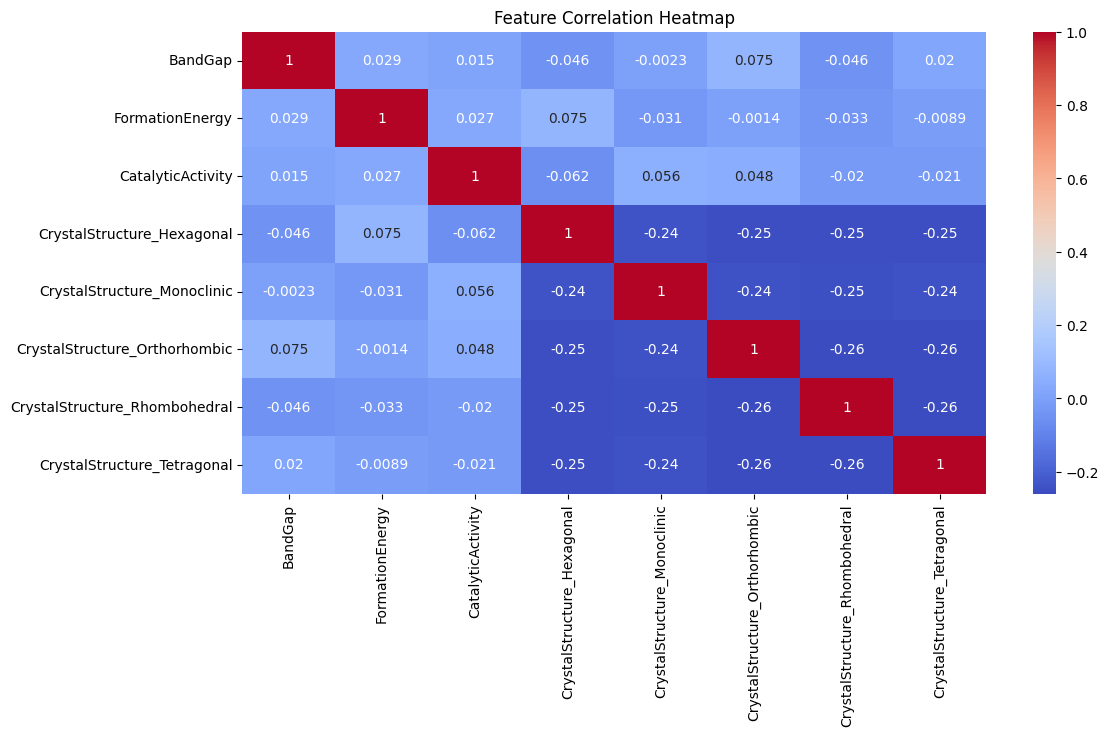

In [8]:
# 8. Feature Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(features_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

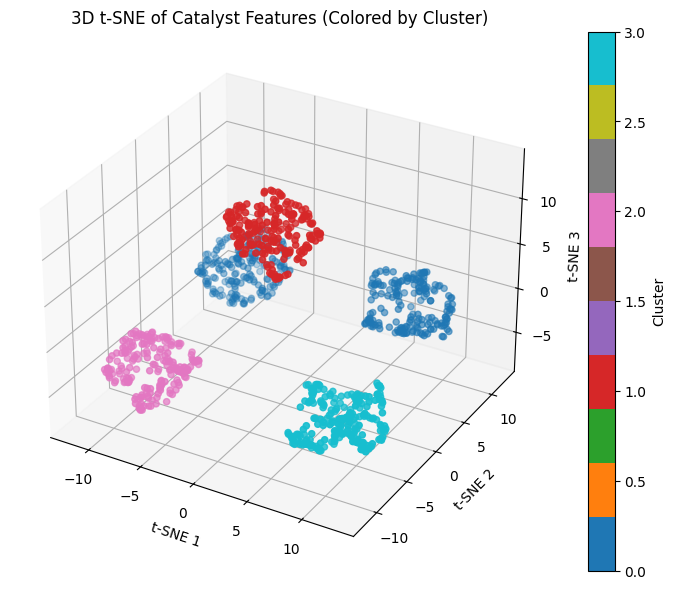

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  

# t-SNE for High-Dimensional Data Visualization

# Run t-SNE in 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(features_scaled_df)

df["TSNE1"], df["TSNE2"], df["TSNE3"] = tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2]

# Plot 3D t-SNE with clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["TSNE1"], df["TSNE2"], df["TSNE3"], c=df["Cluster"], cmap="tab10", s=20)
ax.set_title("3D t-SNE of Catalyst Features (Colored by Cluster)")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
plt.colorbar(scatter, label="Cluster")
plt.show()


✅ Conclusion

In this project, we successfully constructed a metric space for oxide catalysts using machine learning techniques to uncover underlying patterns in their physicochemical properties. Through a robust workflow combining data cleaning, feature engineering, clustering, and dimensionality reduction, we achieved the following:

1. Standardized and transformed a dataset of oxide catalysts with features like band gap, formation energy, catalytic activity, and crystal structure.
2. Applied PCA and t-SNE for dimensionality reduction, allowing us to represent complex high-dimensional catalyst data in 2D and 3D spaces.
3. Used K-Means clustering to group catalysts with similar characteristics, helping identify material families with potentially similar catalytic behavior.
4. Leveraged visualization tools like scatter plots and heatmaps to intuitively interpret relationships and cluster structures in the data.

🔬 Impact:
This metric space provides a foundation for similarity-based catalyst screening, enabling faster identification of promising materials for targeted applications. It demonstrates how machine learning can accelerate materials discovery by revealing structure-property-performance relationships across large datasets.